# Import Libraries

In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import date, timedelta
today = date.today()
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
from datetime import date
#from numba import jit
d1 = today.strftime("%Y-%m-%d")
d3 = date.today() - timedelta(days=30)
d2 = date.today() - timedelta(days=320)
d2 = d2.strftime("%Y-%m-%d")

# Import symbols

In [6]:
tickers=pd.read_csv('sectorwise.csv')

In [3]:
##Pick a sector 
tickers=tickers.loc[tickers['Industry']=="FUEL"]

# Make dataframe of closing values

In [18]:
df=yf.download(tickers=tickers['Symbol'].to_list()[0:20],start=d2)['Close'].pct_change()

[*********************100%***********************]  20 of 20 completed


In [19]:
df=df.dropna()

In [10]:
df=df.tail(len(df)-1)

NameError: name 'df' is not defined

In [20]:
df

,AUBANK.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANDHANBNK.NS,BANKBARODA.NS,CANBK.NS,CENTRALBK.NS,CHOLAFIN.NS,FEDERALBNK.NS,HDFC.NS,HDFCAMC.NS,HDFCBANK.NS,HDFCLIFE.NS,ICICIBANK.NS,ICICIGI.NS,ICICIPRULI.NS,IDFCFIRSTB.NS,INDIANB.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,
2022-05-05 00:00:00+05:30,0.017369,-0.006858,-0.012791,-0.004779,-0.016112,-0.021267,0.008300,-0.010929,0.004423,-0.003176,0.003829,-0.022552,-0.002249,0.003788,0.006282,0.011567,0.003129,0.020833,-0.026757,-0.042421
2022-05-06 00:00:00+05:30,-0.024924,-0.041219,-0.035274,-0.048998,-0.005615,-0.008503,-0.024027,0.016575,-0.109674,-0.032395,-0.029227,0.003897,-0.026128,-0.006670,-0.013104,-0.006590,-0.005654,-0.014031,0.015237,-0.022844
2022-05-09 00:00:00+05:30,-0.028296,-0.014405,0.010509,0.006108,-0.017723,-0.016198,-0.082061,-0.019022,-0.002277,0.029638,0.008207,-0.012998,0.001708,-0.003711,-0.012374,-0.013306,-0.010195,-0.018111,-0.018271,-0.028075
2022-05-10 00:00:00+05:30,-0.012899,-0.005952,-0.011154,-0.017973,0.002076,-0.021792,-0.008195,-0.019390,0.004013,-0.014925,0.015219,-0.007710,0.016062,-0.008247,0.001337,0.002768,-0.011588,-0.011858,-0.011632,0.023660
2022-05-11 00:00:00+05:30,0.009899,0.019098,-0.022032,-0.020486,-0.003505,0.002475,0.012519,-0.031074,-0.021005,-0.018398,0.008086,-0.021328,0.005630,0.007779,0.004077,0.013093,0.018236,-0.020000,-0.029926,0.013835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,-0.044916,-0.022949,-0.024946,-0.006912,-0.030910,-0.023242,-0.032361,-0.041825,-0.017204,-0.026316,-0.012898,-0.025521,-0.012652,-0.023049,-0.016911,0.005534,-0.003299,-0.024064,-0.023006,-0.073987
2023-03-14 00:00:00+05:30,-0.009724,0.000601,-0.011692,-0.017485,-0.054383,-0.009152,-0.007798,-0.037698,0.005948,-0.013514,-0.006912,0.000350,-0.002678,-0.017538,0.002354,-0.008417,-0.014388,0.000913,-0.084632,0.003679
2023-03-15 00:00:00+05:30,-0.012613,-0.010566,0.001601,-0.002233,-0.001213,-0.019704,-0.017988,0.000000,0.002419,-0.009002,-0.011183,-0.021219,-0.014351,-0.008182,-0.005359,-0.010588,-0.007751,-0.000912,0.020116,-0.018468


In [49]:
#Now we take percentages
df=df.pct_change()
df=df.dropna()
df

,AUBANK.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANDHANBNK.NS,BANKBARODA.NS,CANBK.NS,CENTRALBK.NS,CHOLAFIN.NS,FEDERALBNK.NS,...,PEL.NS,PFC.NS,PNB.NS,PSB.NS,RECLTD.NS,SBICARD.NS,SBILIFE.NS,SBIN.NS,UCOBANK.NS,UNIONBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-02 00:00:00+05:30,-1.194260,-1.831260,-1.169230,-1.073691,-50.002804,-1.867385,-1.203019,2.015504,-2.144402,-0.549592,...,-1.179205,-0.265875,10.015516,-inf,-0.812487,-0.244106,-0.737028,0.652183,-inf,-1.397647
2022-09-05 00:00:00+05:30,-3.421187,-0.032662,-1.609957,-0.354415,-4.191358,-2.194504,-3.149019,-1.846454,6.696553,3.966522,...,-2.956578,-0.052000,-1.830950,-1.253217,2.608406,-0.138968,-1.626793,-0.357041,-7.025086,-5.009488
2022-09-06 00:00:00+05:30,-1.271242,-2.025833,-9.667180,-14.125870,-1.150613,-1.145162,-1.662590,4.132647,-0.780943,-1.568481,...,-0.120223,-2.431703,2.291311,2.987160,-2.904882,2.595574,2.437987,-1.497973,-1.162586,-2.114508
2022-09-07 00:00:00+05:30,3.987000,-1.892453,-1.217928,-1.620154,-2.171603,-2.880577,2.112695,-1.144138,-0.805364,0.062764,...,-2.781678,-0.448896,-0.744087,-0.506331,-1.057896,-0.439968,0.109951,3.509065,-2.004098,-1.673731
2022-09-08 00:00:00+05:30,-1.893075,3.477000,2.757481,0.920475,4.579536,4.502421,-2.241560,-2.514706,-2.998850,-0.708392,...,-1.841424,-1.861064,0.855064,-1.000000,13.013210,-0.366034,-1.675244,-3.405988,0.991837,1.316968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,-38.355068,0.252514,0.423677,0.502317,2.505916,0.063244,-0.173398,1.791811,-0.051142,1.942990,...,0.721196,2.294311,0.785070,0.958407,-0.224108,0.429373,28.274061,0.533854,2.045028,-0.216864
2023-03-14 00:00:00+05:30,-0.783503,-1.026176,-0.531297,1.529794,0.759414,-0.606234,-0.759042,-0.098663,-1.345717,-0.486486,...,-0.290623,-0.318653,-1.000000,-0.137929,-0.032816,-0.464001,-1.200869,-0.726192,-0.432791,1.390194
2023-03-15 00:00:00+05:30,0.297101,-18.589409,-1.136910,-0.872278,-0.977690,1.153036,1.306874,-1.000000,-0.593333,-0.333854,...,-0.707216,-0.915426,-inf,-0.836209,-0.882051,-1.842868,-3.175448,0.721480,-1.078941,-0.794216


In [21]:
#Take logarithmic returns
corr=df.corr()
plt.rcParams['figure.figsize'] = [20, 10]


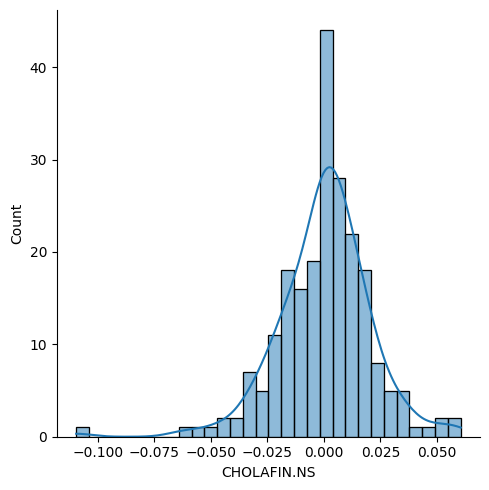

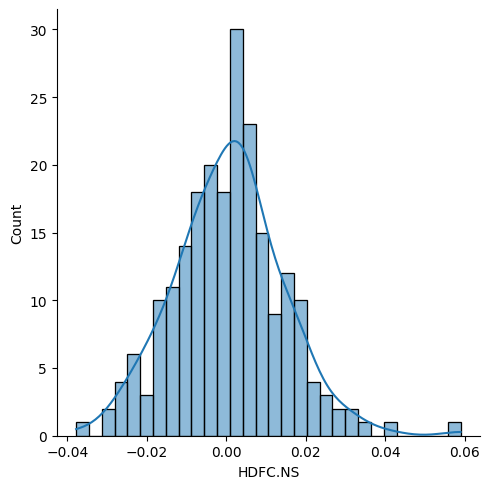

In [99]:
#df['ICICIBANK.NS'].plot()
sns.displot(data=df, x='CHOLAFIN.NS',bins=30,kde=True)
sns.displot(data=df, x='HDFC.NS',bins=30,kde=True)

# Observing The Heatmap of correlation

<AxesSubplot: >

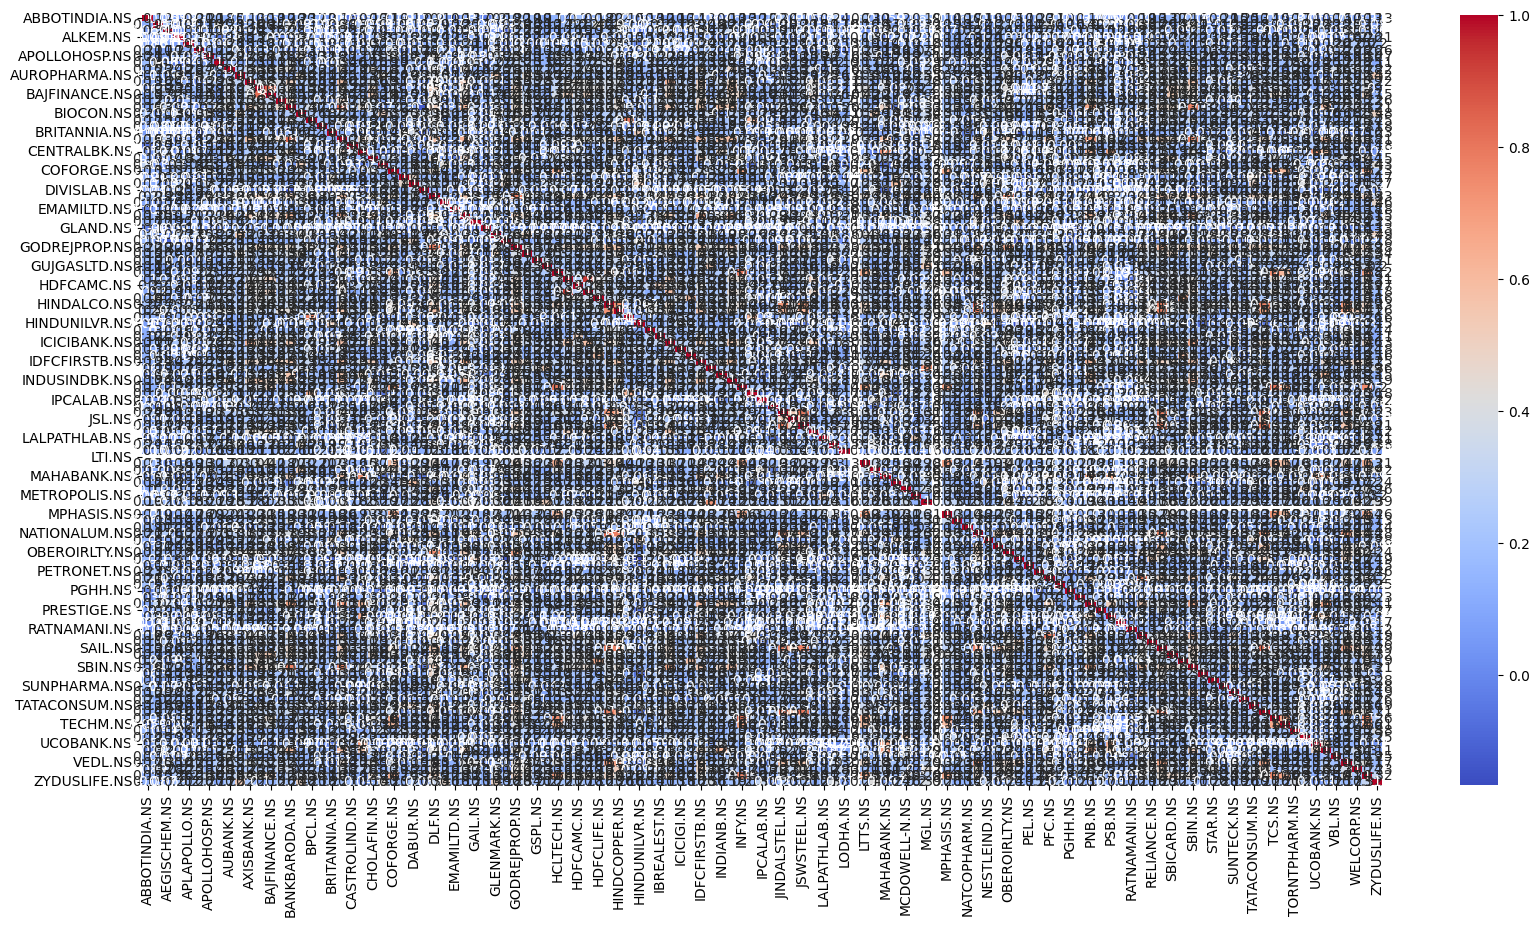

In [21]:
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [22]:
corr.columns

Index(['AUBANK.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BANDHANBNK.NS', 'BANKBARODA.NS', 'CANBK.NS', 'CENTRALBK.NS',
       'CHOLAFIN.NS', 'FEDERALBNK.NS', 'HDFC.NS', 'HDFCAMC.NS', 'HDFCBANK.NS',
       'HDFCLIFE.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS',
       'IDFCFIRSTB.NS', 'INDIANB.NS', 'INDUSINDBK.NS'],
      dtype='object')

0.35909804703779025

In [23]:
corr_long = corr.stack().reset_index()
corr_long.columns = ['stock1', 'stock2', 'correlation']

In [24]:
Finale=corr_long.loc[corr_long['correlation']!=1]

In [25]:
Finale=Finale.sort_values(by='correlation', ascending=False)

In [26]:
Finale=Finale.drop_duplicates('correlation')

In [28]:
Finale.head(10)

,stock1,stock2,correlation
212,HDFC.NS,HDFCBANK.NS,0.929922
106,BANKBARODA.NS,CANBK.NS,0.828532
62,BAJFINANCE.NS,BAJAJFINSV.NS,0.819940
349,IDFCFIRSTB.NS,FEDERALBNK.NS,0.652089
129,CANBK.NS,FEDERALBNK.NS,0.632634
34,AXISBANK.NS,ICICIBANK.NS,0.607575
109,BANKBARODA.NS,FEDERALBNK.NS,0.604417
389,INDUSINDBK.NS,FEDERALBNK.NS,0.599860
333,ICICIPRULI.NS,HDFCLIFE.NS,0.577743
137,CANBK.NS,IDFCFIRSTB.NS,0.576178


# Scatter Plot

<AxesSubplot: xlabel='HDFC.NS', ylabel='HDFCBANK.NS'>

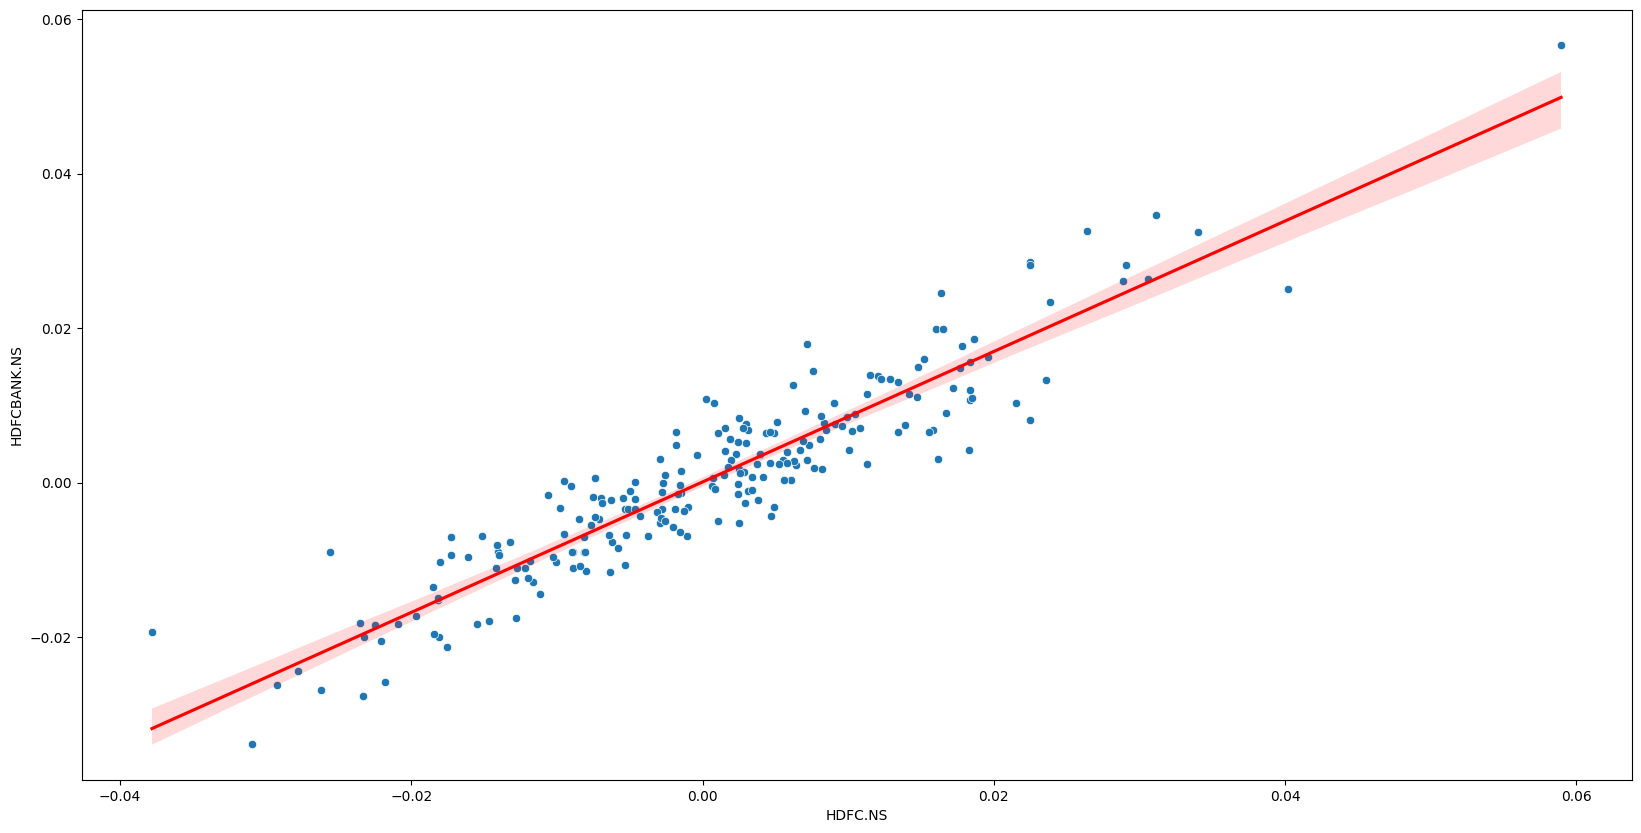

In [74]:
sns.scatterplot(x=df['HDFC.NS'], y=df['HDFCBANK.NS'],data=df)
sns.regplot(x=df['HDFC.NS'], y=df['HDFCBANK.NS'], data=df,color='red',scatter=False)


In [76]:
slope, intercept, r_value, p_value, std_err = linregress(df['HDFC.NS'], df['HDFCBANK.NS'])

# predict y values using the linear regression model
y_pred = slope * df['HDFC.NS'] + intercept

# calculate the RMSE using mean_squared_error
rmse = np.sqrt(mean_squared_error(df['HDFCBANK.NS'], y_pred))

# print the RMSE
print('RMSE:', rmse)
print('standard error:', std_err)
print('slope:', slope)
print('intercept:', intercept)
print('r_value:', r_value)


RMSE: 0.0045568065396851916
standard error: 0.022660867891026015
slope: 0.8440948515982557
intercept: 9.669644229163697e-05
r_value: 0.9299217251738323


In [88]:
Finale=Finale.head(10)

In [96]:
Error_df.sort_values('corr',ascending=False)

,stock1,stock2,error,corr
0,HDFC.NS,HDFCBANK.NS,0.022661,0.929922
19,BANKBARODA.NS,ICICIBANK.NS,0.030288,0.536030
29,IDFCFIRSTB.NS,ICICIBANK.NS,0.033325,0.500276
78,BANKBARODA.NS,HDFCBANK.NS,0.031866,0.384215
89,CANBK.NS,HDFC.NS,0.034609,0.363900
106,INDIANB.NS,ICICIBANK.NS,0.032489,0.343008
171,INDIANB.NS,HDFCBANK.NS,0.032421,0.225049
172,BANDHANBNK.NS,HDFCBANK.NS,0.035525,0.223510
186,CENTRALBK.NS,HDFCBANK.NS,0.028370,0.143783
189,CENTRALBK.NS,HDFC.NS,0.031449,0.092139


In [104]:
Trades=yf.download(tickers=tickers['Symbol'].to_list()[0:20],start=d2)['Close']

[*********************100%***********************]  20 of 20 completed


In [105]:
des

NameError: name 'des' is not defined

In [106]:
zscores = stats.zscore(Trades['HDFC.NS']-Trades['HDFCBANK.NS'])

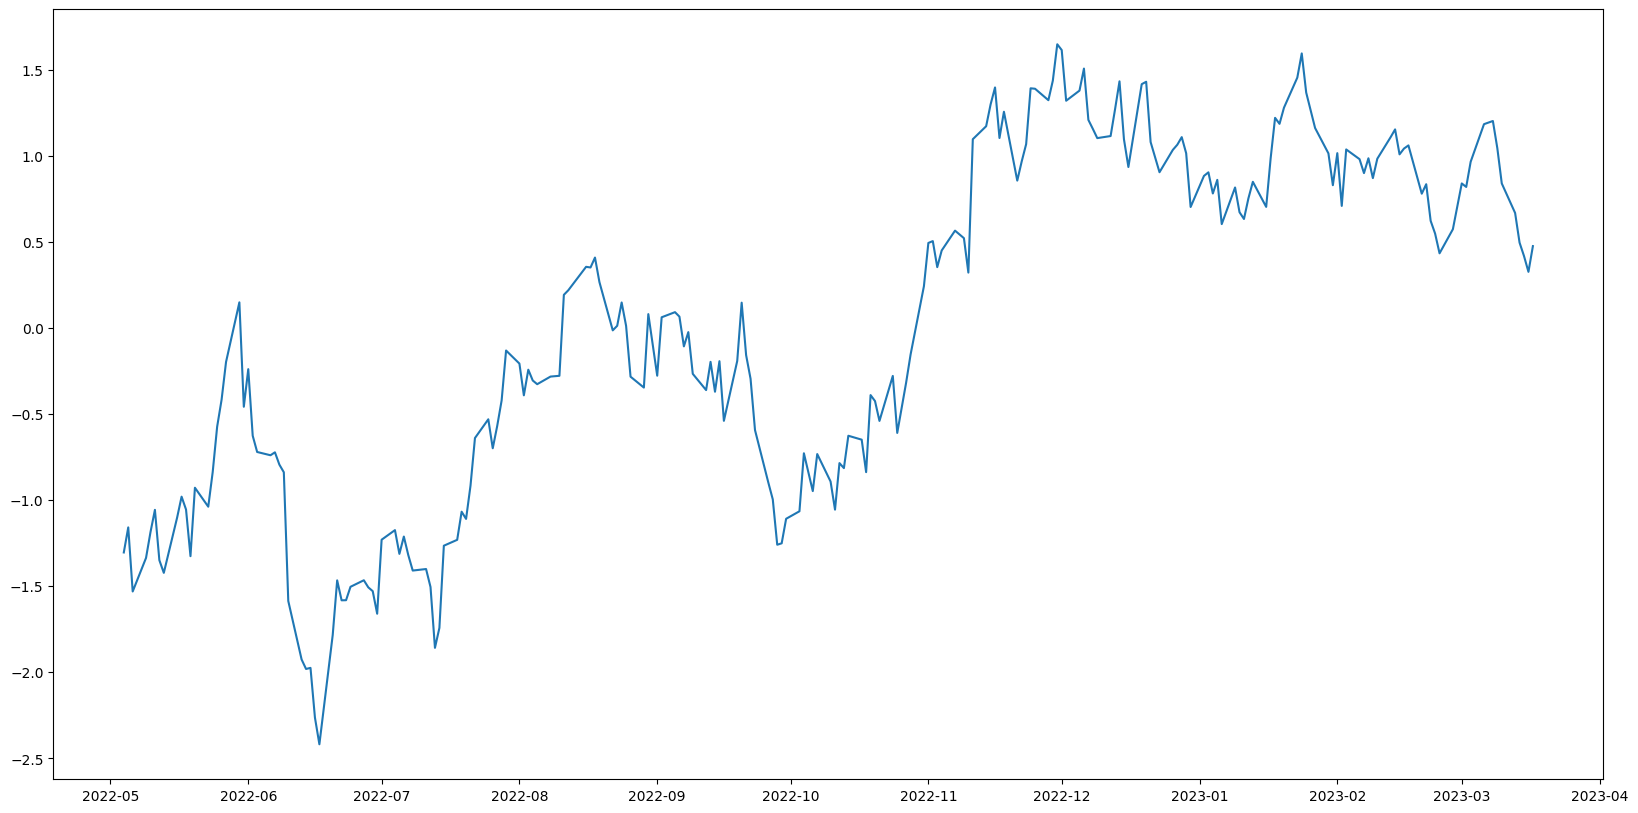

In [108]:
plt.plot(zscores)

In [110]:
from statsmodels.tsa.stattools import adfuller
series = Trades['HDFC.NS']-Trades['HDFCBANK.NS']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.834711
p-value: 0.363370
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
